# OOP MODELLING WITH C (C++ COMPARISON)

<br>
<br>
   Since C is not an object-oriented language, it does not have features such as Class Methodology, Encapsulation, Inheritance, and Polymorphism that C ++ and other object-oriented languages have.

However, object simulation can be accomplished using struct and function pointers.

Note:The codes are located in this repo, in folders named according to the language in which they are written.

## Structs

Structs is a collection of different types of variables.They cannot contain any type other than variables (like a function).
<br>
C++ classes contain variables and methods.These variables and methods can be accessed with objects created from the class(According to private and public definitions).

A simple C struct defined in the .h file must look like this:

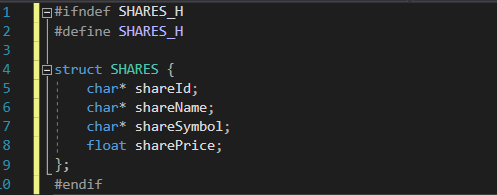

The C ++ code for this example is as follows:

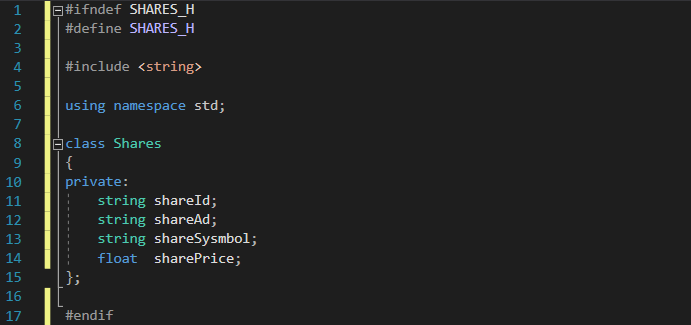

-Since the C language does not include the string type, char pointer is used instead.
<br>
-Because C++ contains private and public members (default private), the most valuable data is called private.This way, any object created outside of this class cannot access these members.
<br>

In C++, private or public functions of the class can be declared directly in the class.Since these files are .h files, they do not contain a function body.
<br>
Since C structs can only contain variables, they cannot contain function declarations.Function pointers are used so that functions to be defined in the struct can only be accessed from this.

## Function Pointers /.h Files

The structure of function pointers is as follows:

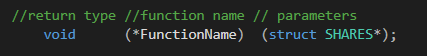

After the function pointer is defined in the struct, another function to be accessed from outside is defined with this function. This defined function must be outside the struct in order to provide access.

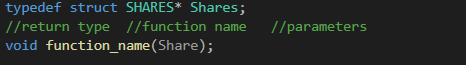

The binding of these functions will be shown later.

In C ++, the function definition is done in this way:

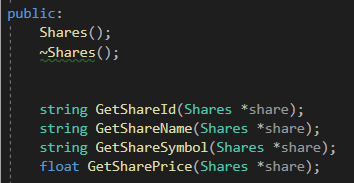

Comparison of the two codes:

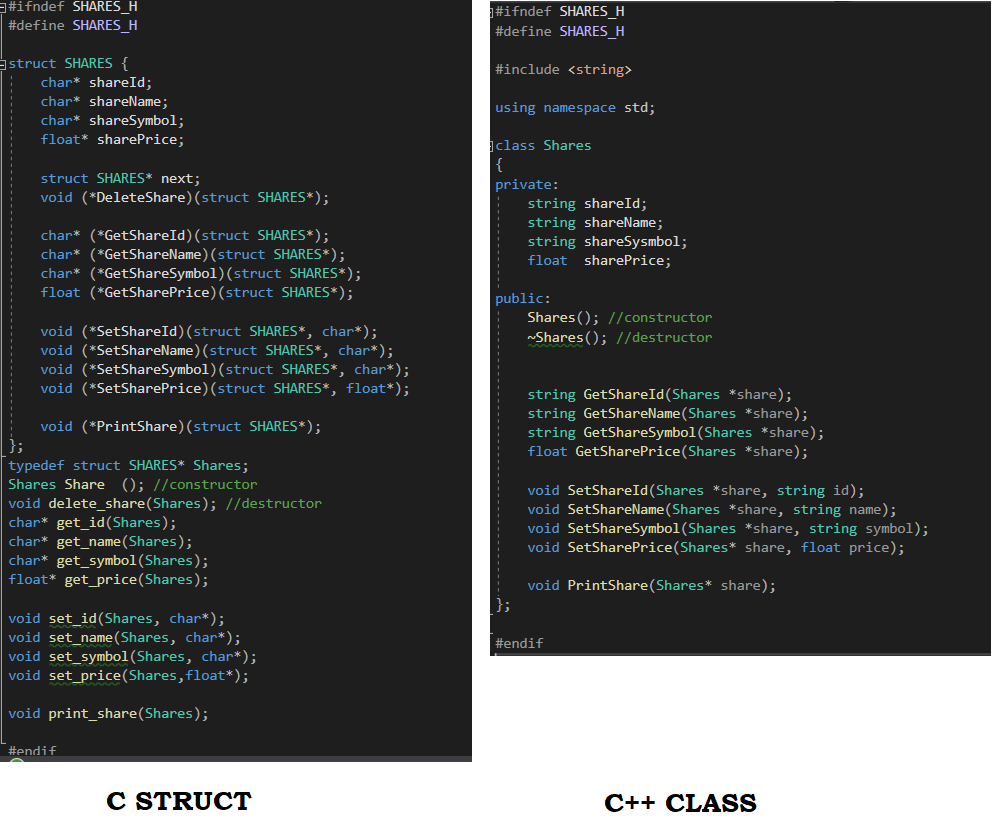

In order to model Encapsulation, which is one of the features of object-oriented programming, get and set methods are defined to access members.

<b>Encapsulation:<b> 
    In normal terms Encapsulation is defined as wrapping up of data and information under a single unit. In Object Oriented Programming, Encapsulation is defined as binding together the data and the functions that manipulates them.[1]

Function bodies were defined in .c and .cpp files after the .h files were completed.

## Function Bodies/ .c And .cpp Files

First of all, it is started from .cpp to avoid confusion.The bodies of the functions mentioned above are as follows:

## REFERENCES:
<br>
[1]https://www.geeksforgeeks.org/encapsulation-in-c/
<br>